In [1]:
'''
256.000 kaotik değer üzerinden, 
Her değer 4 bit ile ifade edilmiş,
mod 16'a göre işlem yapılmıştır

'''

"\n256.000 kaotik değer üzerinden, \nHer değer 4 bit ile ifade edilmiş,\nmod 16'a göre işlem yapılmıştır\n\n"

#### Gerekli kütüphanelerin projeye eklenmesi

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import chi2

#### Başlangıç değerlerinin oluşturulması

In [3]:
r = 4 
x_initial = 0.838178032758474
n_iterations = 256_000
n = 16 # mod 16 işlemi alınması istenmiştir

#### Lojistik haritalama fonksiyonun oluşturulması

In [4]:
def logistic_map(x, r):
    return r * x * (1 - x)

##### 256_000 tane değerin Lojistik haritalama fonksiyonuna gönderilmesi ve değerlerin üretilmesi

In [5]:
def Calculate():

     # Değerleri saklamak için dizi oluşturulması
    global key_values
    key_values = np.zeros(n_iterations)
    key_values[0] = logistic_map(x_initial, r)

    # Dizinin oluşturulması
    for i in range(1, n_iterations):
        key_values[i] = logistic_map(key_values[i-1], r)

In [6]:
Calculate() # Fonksiyon çağrılarak hesaplanması sağlanmıştır

##### Üretilen değerlerin txt formatında kaydedilmesi

In [7]:
# Elde edilen değerlerin txt dosyasına yazdırılması
with open("Output/Mod_16_256_000/Key_Values.txt", "w") as file:
    for item in key_values:
        file.write(f"{item:.15f}\n") # 15 basamağa kadar hassasiyetle çalışılmıştır

##### 1. Mod Fonksiyonu

In [8]:
def Mod():

    global mod_values
    mod_values = np.zeros(n_iterations)

    for i in range (1, n_iterations + 1):
        #mod_values[i-1] = int(round(10 * key_values[i-1])) % 10
        mod_values[i-1] = int(100 * key_values[i-1]) % n # yuvarlama yapmadan hesaplama yapılmıştır.

In [9]:
Mod() # Mod fonksiyonun çağrılması ve değerlerin txt dosyasına yazdırılması

with open("Output/Mod_16_256_000/Mod_Values.txt", "w") as file:
    for item in mod_values:
        file.write(f"{int(item)}\n") 

##### Ki - Kare Değerinin Hesaplanması

In [10]:
# Ki-kare fonksiyonu
def get_chi_square_value(df, alpha):
  
  if alpha <= 0 or alpha >= 1:
    raise ValueError("Alpha değeri 0 ve 1 arasında olmalı.")

  return chi2.ppf(1 - alpha, df)

In [11]:
df = 15  # df = k_max - k_min şeklinde sadeleşebilir. 
alpha_values = [0.995, 0.990, 0.975, 0.95, 0.9, 0.75, 0.5, 0.25, 0.1, 0.05, 0.025, 0.005, 0.025, 0.01, 0.005, 0.001]

for alpha in alpha_values:
  
  chi_square_value = get_chi_square_value(df, alpha)
  print(f"Alpha: {alpha:.3f}, Chi-Square Value: {chi_square_value:.2f}")

Alpha: 0.995, Chi-Square Value: 4.60
Alpha: 0.990, Chi-Square Value: 5.23
Alpha: 0.975, Chi-Square Value: 6.26
Alpha: 0.950, Chi-Square Value: 7.26
Alpha: 0.900, Chi-Square Value: 8.55
Alpha: 0.750, Chi-Square Value: 11.04
Alpha: 0.500, Chi-Square Value: 14.34
Alpha: 0.250, Chi-Square Value: 18.25
Alpha: 0.100, Chi-Square Value: 22.31
Alpha: 0.050, Chi-Square Value: 25.00
Alpha: 0.025, Chi-Square Value: 27.49
Alpha: 0.005, Chi-Square Value: 32.80
Alpha: 0.025, Chi-Square Value: 27.49
Alpha: 0.010, Chi-Square Value: 30.58
Alpha: 0.005, Chi-Square Value: 32.80
Alpha: 0.001, Chi-Square Value: 37.70


#### Modulus --- Gözlemlenen ve Beklenen Değerlerin Frekansları

In [12]:
# Mevcut bekelenen 256.000 elemanlı dizi
expected = [n_iterations/n] * n

# Gözlenen frekansları hesapla (0'dan 9'a kadar olan sayılar için)
observed = [np.sum(mod_values == i) for i in range(n)]
print (f"Gözlemlenen frekanslar (observed): {observed}")

Gözlemlenen frekanslar (observed): [30056, 21458, 21535, 29996, 13177, 13065, 12789, 12522, 12452, 12594, 12443, 12592, 12533, 12748, 12785, 13255]


##### Modulus --- p_value Değerinin Değerinin Hesaplanması

In [13]:
# chi2_stat: Bu, örneğin gözlenen ve beklenen frekanslar arasındaki farkı test etmek için verilerinizden hesaplanan gerçek Ki kare istatistiğidir. 
# Bu değeri p-değerini hesaplamak için kullanılmakatadır.
def calculate_chi2_stat(observed, expected, epsilon=1e-10):
   
    if len(observed) != len(expected):
        raise ValueError("Gözlenen ve beklenen frekanslar aynı uzunlukta olmalıdır.")
    
    observed = np.array(observed)
    expected = np.array(expected)

    # Beklenen frekanslar 0 olan durumlar için epsilon ekle
    adjusted_expected = np.where(expected == 0, epsilon, expected)
    
    chi2_stat = np.sum((observed - adjusted_expected) ** 2 / adjusted_expected)
    
    return chi2_stat

In [14]:
chi2_stat = calculate_chi2_stat(observed, expected)

In [15]:
# p_value değeri
def calculate_p_value(chi2_stat, df):
    return 1 - chi2.cdf(chi2_stat, df)

In [16]:
calculate_p_value(chi2_stat, df)

0.0

##### Modulus --- Ki-Kare Testi ve Histogramın Çizilmesi

In [17]:
def ki_kare_test_and_hist(decimx, k_min, k_max, step=1):
    n = len(decimx)
    
    Beklenen = np.floor(n / (k_max - k_min + 1))

    # Histogram hesaplama
    R, _ = np.histogram(decimx, bins=range(k_min, k_max + 2))

    Ki_kare = 0

    for i in range(k_min, k_max + 1):
        Ki_kare += (R[i - k_min] - Beklenen) ** 2 / Beklenen

    # Histogram grafiğini çizme
    bars = plt.bar(range(k_min, k_max + 1), R[:k_max - k_min + 1], align='center', alpha=0.7)

    # Bar grafiğinin her bir barı üzerine değerleri ekleme
    for bar in bars:
        yval = bar.get_height()  # Barın yüksekliği (frekans değeri)
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.0f}', va='bottom', ha='center')

    plt.xlabel('Değerler')
    plt.ylabel('Frekans')
    plt.title(f'Histogram (Toplam Veri Sayısı: {n:_})')  # Başlığa veri sayısını binlik ayırıcı ile ekleme
    plt.xticks(range(k_min, k_max + 1, step), rotation=45)  # X ekseni etiketlerini 45 derece döndürme

    plt.show()

    return Ki_kare

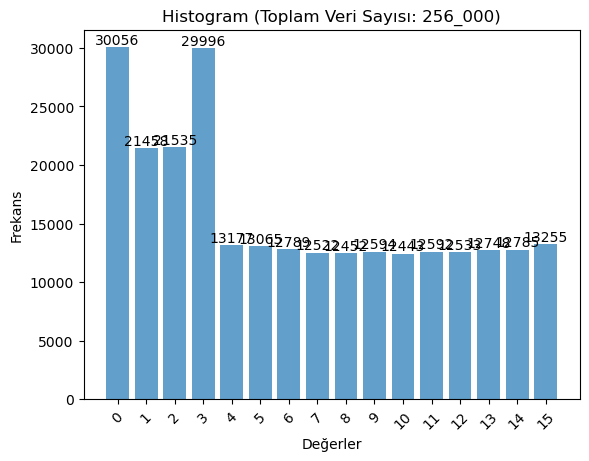

Ki-kare değeri: 36362.399750000004


In [18]:
mod = ki_kare_test_and_hist(mod_values, k_min = 0, k_max = 15, step = 1)
print(f"Ki-kare değeri: {mod}")

##### 2. Fraction Fonksiyonu

In [19]:
# Kesirli kısmı hesaplama fonksiyonu
def fractional_part(x):
    return x - np.floor(x)  # 3.14 - 3 = 0.14

# Çıkan değerin ilk basamağının elde edilmesi
frac_values = np.zeros(n_iterations)

for i in range(1, n_iterations + 1):
    fractional = fractional_part(key_values[i-1])
    frac_values[i-1] = int(fractional * 100) % n

In [20]:
# Elde edilen değerlerin txt dosyasına yazdırılması
with open("Output/Mod_16_256_000/Frac_Values.txt", "w") as file:
    for item in frac_values:
        file.write(f"{int(item)}\n") 

#### Fraction --- Gözlemlenen ve Beklenen Değerlerin Frekansları

In [21]:
# Mevcut bekelenen 256.000 elemanlı dizi
expected = [n_iterations/n] * n

# Gözlenen frekansları hesapla (0'dan 9'a kadar olan sayılar için)
observed = [np.sum(frac_values == i) for i in range(n)]
print (f"Gözlemlenen frekanslar (observed): {observed}")

Gözlemlenen frekanslar (observed): [30056, 21458, 21535, 29996, 13177, 13065, 12789, 12522, 12452, 12594, 12443, 12592, 12533, 12748, 12785, 13255]


##### Fraction --- p_value Değerinin Değerinin Hesaplanması

In [22]:
chi2_stat = calculate_chi2_stat(observed, expected)
calculate_p_value(chi2_stat, df)

0.0

##### Fraction --- Ki-Kare Testi ve Histogramın Çizilmesi

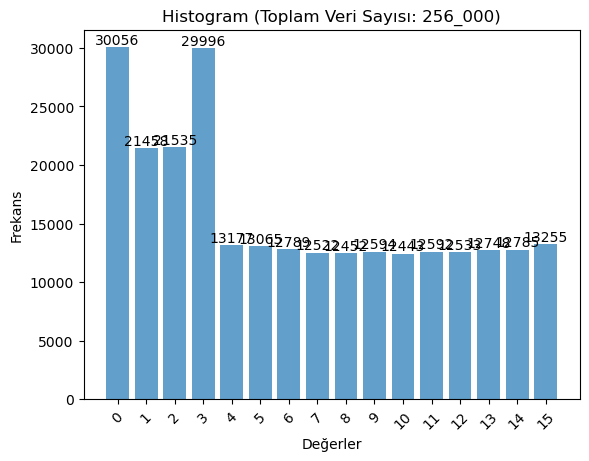

Ki-kare değeri: 36362.399750000004


In [23]:
frac = ki_kare_test_and_hist(frac_values, k_min = 0, k_max = 15, step = 1)
print(f"Ki-kare değeri: {frac}")

##### 3. Threshold Fonksiyonu

In [24]:
threshold = 0.5

threshold_values = np.zeros(n_iterations) 

for i in range(1, n_iterations):

    # Sayının tamamından - Tam kısmı çıkarılır  
    threshold_values[i-1] = key_values[i-1] - np.floor(key_values[i-1])   
   
    if threshold_values[i-1] < threshold:
        threshold_values[i-1] = 0

    else:
        threshold_values[i-1] = n-1

In [25]:
# Elde edilen değerlerin txt dosyasına yazdırılması
with open("Output/Mod_16_256_000/Threshold_Values.txt", "w") as file:
    for item in threshold_values:
        file.write(f"{int(item)}\n") 

#### Threshold --- Gözlemlenen ve Beklenen Değerlerin Frekansları

In [26]:
# Mevcut bekelenen 256.000 elemanlı dizi
expected = [n_iterations/2] + [0] * (n-2) + [n_iterations/2]

# Gözlenen frekansları hesapla (0'dan 9'a kadar olan sayılar için)
observed = [np.sum(threshold_values == i) for i in range(n)]
print (f"Gözlemlenen frekanslar (observed): {observed}")

Gözlemlenen frekanslar (observed): [128021, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 127979]


##### Threshold --- p_value Değerinin Değerinin Hesaplanması

In [27]:
# Burada sıfıra bölme hatasıyla karşılşamamak için epsilon=1e-10 şeklinde çok küçük bir hassiyet değeri calculate_chi2_stat(observed, expected) fonksiyonuna eklenmiştir.
chi2_stat = calculate_chi2_stat(observed, expected)
calculate_p_value(chi2_stat, df)

1.0

##### Threshold --- Ki-Kare Testi ve Histogramın Çizilmesi

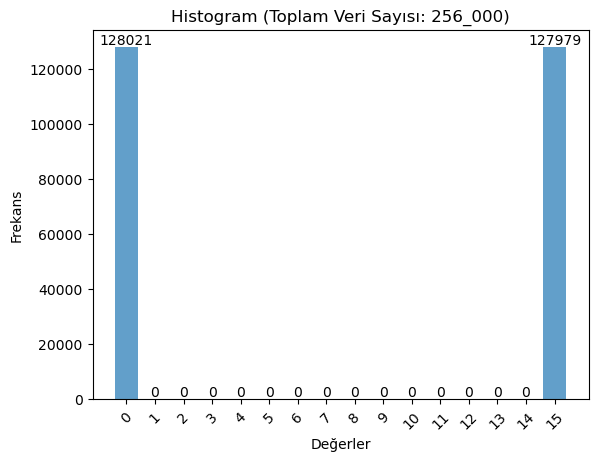

Ki-kare değeri: 1792000.055125


In [28]:
threshold = ki_kare_test_and_hist(threshold_values, k_min = 0, k_max = 15, step = 1)
print(f"Ki-kare değeri: {threshold}")

##### 4. Sin Fonksiyonu

In [29]:
# Dizinin oluşturulması
sin_values = np.zeros(n_iterations)

for i in range(1, n_iterations + 1):
    sin_values[i-1] = int((np.sin(2 * np.pi * key_values[i-1]) + 1) * 50) % n

In [30]:
# Elde edilen değerlerin txt dosyasına yazdırılması
with open("Output/Mod_16_256_000/Sin_Values.txt", "w") as file:
    for item in sin_values:
        file.write(f"{int(item)}\n")

In [31]:
# Mevcut bekelenen 256.000 elemanlı dizi
expected = [n_iterations/n] * n

# Gözlenen frekansları hesapla (0'dan 15'a kadar olan sayılar için)
observed = [np.sum(sin_values == i) for i in range(n)]
print (f"Gözlemlenen frekanslar (observed): {observed}")

Gözlemlenen frekanslar (observed): [26707, 25815, 25901, 26975, 13589, 13030, 12679, 12136, 11984, 12125, 11850, 12280, 12153, 12490, 12825, 13461]


##### Sin --- p_value Değerinin Değerinin Hesaplanması

In [32]:
chi2_stat = calculate_chi2_stat(observed, expected)
calculate_p_value(chi2_stat, df)

0.0

##### Sin --- Ki-Kare Testi ve Histogramın Çizilmesi

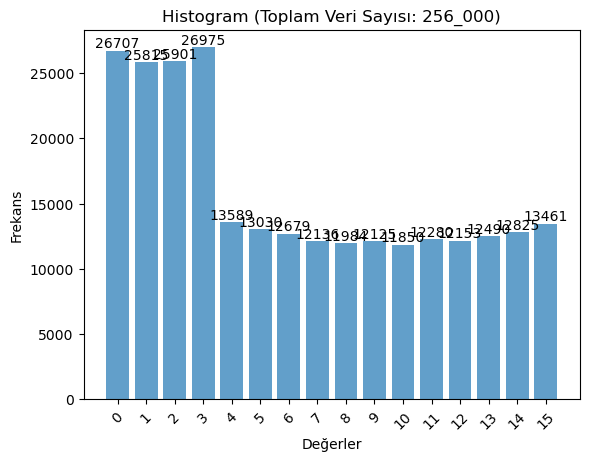

Ki-kare değeri: 35993.70587499999


In [33]:
sin = ki_kare_test_and_hist(sin_values, k_min = 0, k_max = 15, step = 1)
print(f"Ki-kare değeri: {sin}")

##### 5. Lineer Fonksiyon

In [34]:
# Başlangıç değerlerinin verilmesi
a = 1.5
b = -0.5

In [35]:
# Dizinin oluşturulması
lts_values = np.zeros(n_iterations)
for i in range(1, n_iterations + 1):
    lts_values[i-1] = (np.floor((a * key_values[i-1] + b) * 100)) % n

In [36]:
# Elde edilen değerlerin txt dosyasına yazdırılması
with open("Output/Mod_16_256_000/Lineer_Values.txt", "w") as file:
    for item in lts_values:
        file.write(f"{int(item)}\n")

In [37]:
# Mevcut bekelenen 256.000 elemanlı dizi
expected = [n_iterations/n] * n

# Gözlenen frekansları hesapla (0'dan 15'a kadar olan sayılar için)
observed = [np.sum(lts_values == i) for i in range(n)]
print (f"Gözlemlenen frekanslar (observed): {observed}")

Gözlemlenen frekanslar (observed): [18093, 18355, 18859, 26425, 12911, 12977, 12721, 12781, 12733, 12799, 12772, 12795, 12825, 13072, 26677, 19205]


##### Lineer --- p_value Değerinin Değerinin Hesaplanması

In [38]:
chi2_stat = calculate_chi2_stat(observed, expected)
calculate_p_value(chi2_stat, df)

0.0

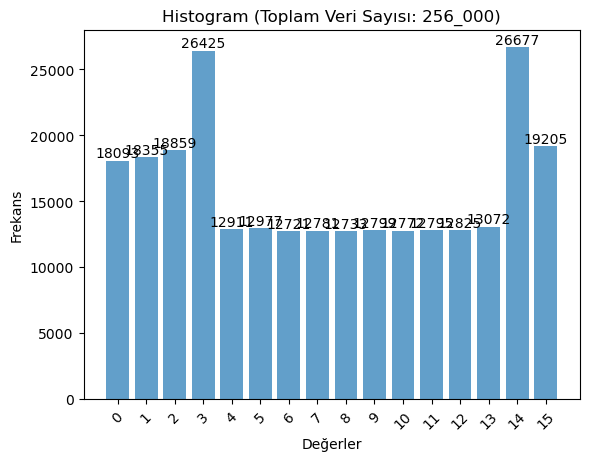

Ki-kare değeri: 21944.455875000003


In [39]:
lts = ki_kare_test_and_hist(lts_values, k_min = 0, k_max = 15, step = 1)
print(f"Ki-kare değeri: {lts}")